In [2]:
# Python package that makes working with labelled multi-dimensional arrays simple and efficient
import xarray as xr
# import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
#import numpy as np
import cartopy.crs as ccrs # maps
import cartopy.feature as cfeature # maps and features (eg. borders, lakes)

# first ds

IMPORTANT: if there is a download error when using cartopy features, go to https://www.naturalearthdata.com/downloads/ or go to all urls specified in error and download required files. Extract all files in <your-user-name>/.local/share/cartopy/shapefiles/natural_earth/ and then physical or cultural depending on the feature

In [35]:
###specifying file name and location
path = 'H:/Summer24-25/'
filename = path + 'trends_mad_2005_2015.h0.2014-09.nc'
print(filename)

H:/Summer24-25/trends_mad_2005_2015.h0.2014-09.nc


In [36]:
##reading in data and listing information
ds = xr.open_dataset(filename)
ds
###variable names are case-sensitive

<xarray.Dataset> Size: 312MB
Dimensions:       (time: 1, lev: 88, lat: 192, lon: 288, ilev: 89, nbnd: 2,
                   zlon: 1)
Coordinates:
  * ilev          (ilev) float64 712B 4.5e-06 7.42e-06 1.223e-05 ... 985.0 1e+03
  * lat           (lat) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lev           (lev) float64 704B 5.96e-06 9.827e-06 1.62e-05 ... 977.5 992.5
  * lon           (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * time          (time) datetime64[ns] 8B 2014-10-01
  * zlon          (zlon) float64 8B 0.0
Dimensions without coordinates: nbnd
Data variables: (12/30)
    BR            (time, lev, lat, lon) float32 19MB ...
    BRCL          (time, lev, lat, lon) float32 19MB ...
    BRO           (time, lev, lat, lon) float32 19MB ...
    BRONO2        (time, lev, lat, lon) float32 19MB ...
    CH4           (time, lev, lat, lon) float32 19MB ...
    CL            (time, lev, lat, lon) float32 19MB ...
    ...            ...
    hyam          (lev) float64 704B ...
    hybi          (ilev) float64 712B ...
    hybm          (lev) float64 704B ...
    time_bnds     (time, nbnd) datetime64[ns] 16B ...
    time_written  (time) |S8 8B ...
    zlon_bnds     (zlon, nbnd) float64 16B ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              trends_mad_2005_2015
    logname:           anderss1
    host:              
    initial_file:      /fmi/datasets/CESM-INPUT/inputdata/atm/cam/inic/fv/f.e...
    topography_file:   /fmi/datasets/CESM-INPUT/inputdata/atm/cam/met/MERRA2/...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1
    history:           Mon Nov 15 12:05:45 2021: ncks -v NOX,NOY,O3,HNO3,CL,C...
    NCO:               netCDF Operators version 4.9.3 (Homepage = http://nco....

In [37]:
#run this statement to alter size of all graphs
mpl.rcParams['figure.figsize'] = [8,5]

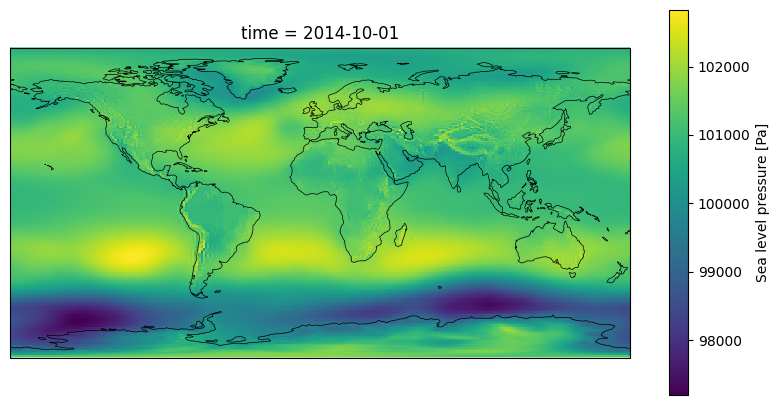

In [38]:
#To plot the PS at first timestep (using index select)
fig=plt.figure(figsize=(10,5))
ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.5)
ds.PSL.isel(time=0).plot(ax=ax)
# to plot PS at select time -- example as this dataset has one time only:
#ds.PS.sel(time = '2015-10', method = 'nearest').plot() #'nearest' method rounds to nearest variable state

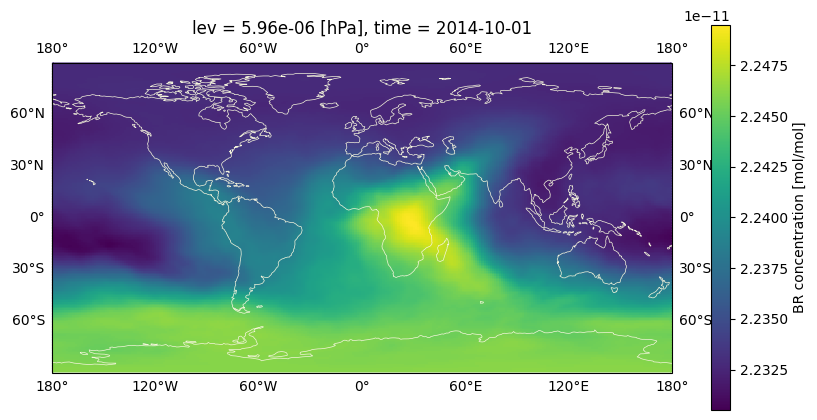

In [66]:
# plotting BR levels at initial time, and first level
fig=plt.figure(figsize=(10,5))
ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.5, color="beige")
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1., color='w', alpha=0, linestyle='--')
ds.BR.isel(lev=0,time=0).plot(ax=ax)

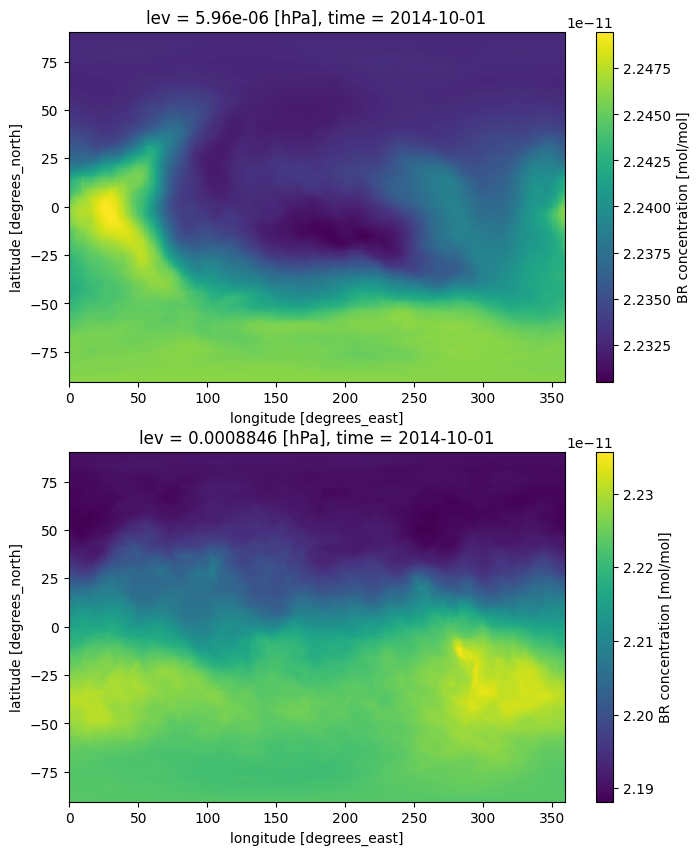

In [154]:
# multiple graphs one plot
fig, axs = plt.subplots(2,figsize=[8,10])
ds.BR.isel(lev=0,time=0).plot(ax=axs[0])
ds.BR.isel(lev=10,time=0).plot(ax=axs[1])

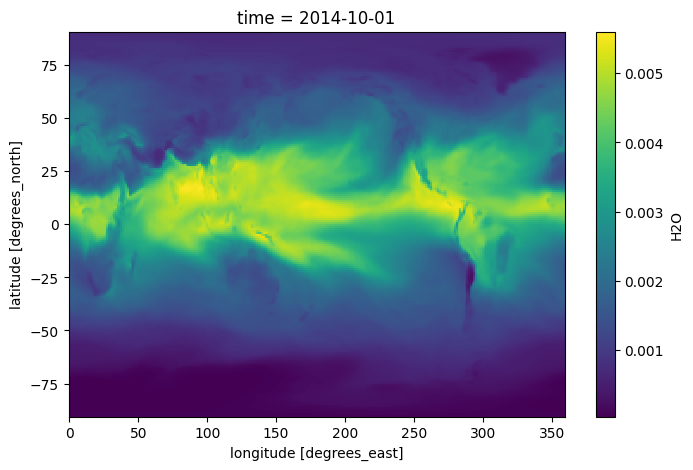

In [26]:
ds.H2O.isel(time=0).mean(dim='lev').plot(figsize=[8,5])

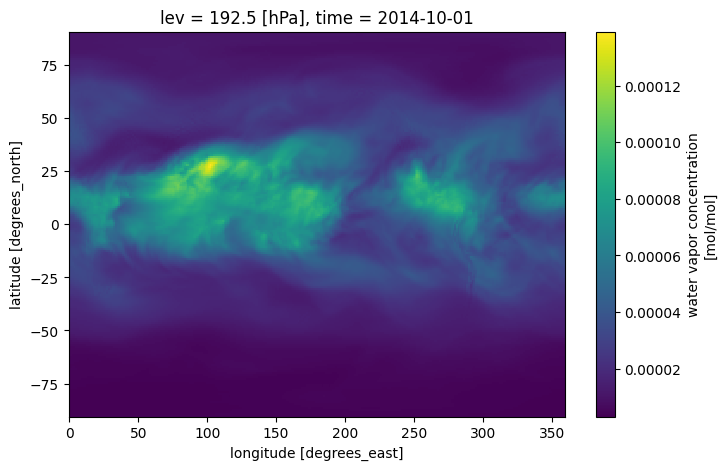

In [9]:
ds.H2O.sel(time="2014-10-30", lev=200, method="nearest").plot(figsize=[8,5])

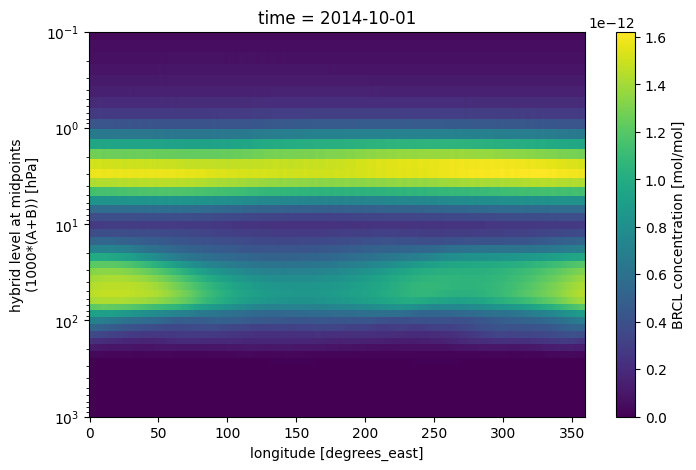

In [102]:
cbar_label = ds.BRCL.attrs["long_name"] + " [" + ds.BRCL.attrs["units"] + "]"
ds.BRCL.isel(time=0).mean(dim='lat').plot(figsize=[8,5], ylim=0.1, cbar_kwargs={"label": cbar_label})
plt.ylim(plt.ylim()[::-1]) # inverting y axis
plt.yscale('log') # using log scale on y axis

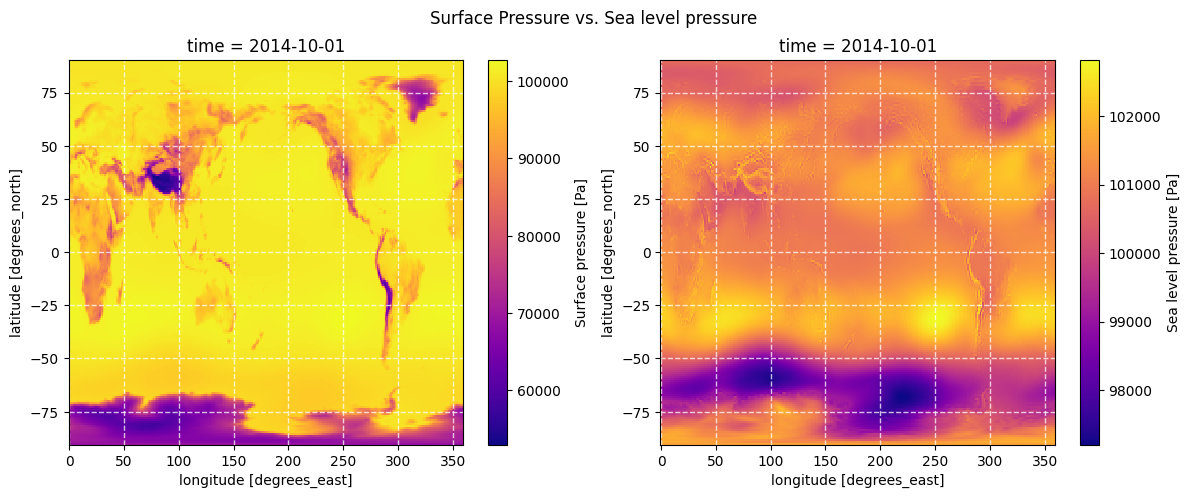

In [92]:
# Some example data to display
mpl.rcParams['figure.figsize'] = [14, 5] #altering width of plot
fig, axs = plt.subplots(1, 2) #creating subplot. 1 row, 2 columns
fig.suptitle('Surface Pressure vs. Sea level pressure') #title
ds.PS.isel(time=0).plot(ax=axs[0], cmap="plasma")
ds.PSL.isel(time=0).plot(ax=axs[1], cmap="plasma")
for ax in axs:
    ax.grid(lw=1, ls="--", c="w", alpha=0.75)

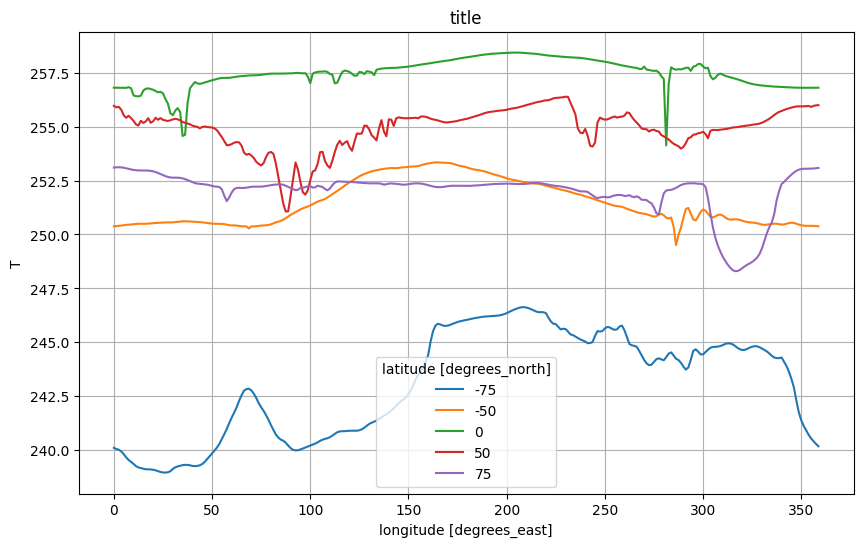

In [5]:
fig,ax = plt.subplots(figsize=[10,6])
ds.T.isel(time=0).mean(dim="lev").interp(lat=[-75,-50,0,50,75]).plot.line(hue="lat", ax=ax)
ax.set_title("title")
ax.grid(True)

In [30]:
# example changing units of something: (pa-> hpa)
# hpa = ds.T.lev/100
# ds["lev"] = hpa
# ds.T.lev.attrs["units"] = "hpa"
ds.T.lev

<xarray.DataArray 'lev' (lev: 88)> Size: 704B
array([5.960300e-06, 9.826900e-06, 1.620185e-05, 2.671225e-05, 4.404100e-05,
       7.261275e-05, 1.197190e-04, 1.973800e-04, 3.254225e-04, 5.365325e-04,
       8.846025e-04, 1.458457e-03, 2.404575e-03, 3.978250e-03, 6.556826e-03,
       9.075326e-03, 1.500000e-02, 2.635000e-02, 4.014251e-02, 5.679251e-02,
       7.767251e-02, 1.045240e-01, 1.395990e-01, 1.854220e-01, 2.449376e-01,
       3.217836e-01, 4.204236e-01, 5.462926e-01, 7.059566e-01, 9.072871e-01,
       1.159975e+00, 1.475650e+00, 1.867880e+00, 2.352591e+00, 2.948321e+00,
       3.676501e+00, 4.561686e+00, 5.631801e+00, 6.918321e+00, 8.456392e+00,
       1.028492e+01, 1.246015e+01, 1.505025e+01, 1.812435e+01, 2.176100e+01,
       2.604911e+01, 3.108891e+01, 3.699271e+01, 4.390966e+01, 5.201591e+01,
       6.149566e+01, 7.255786e+01, 8.543902e+01, 1.005144e+02, 1.182500e+02,
       1.391150e+02, 1.636615e+02, 1.925410e+02, 2.265135e+02, 2.664791e+02,
       3.127916e+02, 3.562501e+02, 3.937501e+02, 4.312501e+02, 4.687501e+02,
       5.062501e+02, 5.437501e+02, 5.812501e+02, 6.187502e+02, 6.562502e+02,
       6.875001e+02, 7.125001e+02, 7.375001e+02, 7.625000e+02, 7.875000e+02,
       8.100002e+02, 8.275002e+02, 8.425001e+02, 8.575000e+02, 8.724999e+02,
       8.875000e+02, 9.024999e+02, 9.174999e+02, 9.325001e+02, 9.475000e+02,
       9.624998e+02, 9.774999e+02, 9.925000e+02])
Coordinates:
  * lev      (lev) float64 704B 5.96e-06 9.827e-06 1.62e-05 ... 977.5 992.5
Attributes:
    long_name:      hybrid level at midpoints (1000*(A+B))
    units:          hPa
    positive:       down
    standard_name:  atmosphere_hybrid_sigma_pressure_coordinate
    formula_terms:  a: hyam b: hybm p0: P0 ps: PS

In [31]:
#adding new variable--> temperature but in celcius not kelvin
ds["T_c"] = ds.T - 273.15
ds.T_c.attrs["units"] = "celcius"
ds.T_c.attrs["standard_name"] = "temperature in celcius"
ds.T_c

<xarray.DataArray 'T_c' (time: 1, lev: 88, lat: 192, lon: 288)> Size: 19MB
array([[[[392.58078  , 392.58078  , 392.58078  , ..., 392.58078  ,
          392.58078  , 392.58078  ],
         [392.37247  , 392.32944  , 392.28653  , ..., 392.4979   ,
          392.45645  , 392.41428  ],
         [391.85196  , 391.79788  , 391.7429   , ..., 392.02744  ,
          391.96695  , 391.90933  ],
         ...,
         [425.23618  , 425.20798  , 425.17996  , ..., 425.3226   ,
          425.29343  , 425.26462  ],
         [426.5048   , 426.49265  , 426.48056  , ..., 426.54086  ,
          426.52872  , 426.51627  ],
         [427.69968  , 427.69968  , 427.69968  , ..., 427.69968  ,
          427.69968  , 427.69968  ]],

        [[317.03867  , 317.03867  , 317.03867  , ..., 317.03867  ,
          317.03867  , 317.03867  ],
         [317.05746  , 317.0457   , 317.03268  , ..., 317.08847  ,
          317.0795   , 317.06985  ],
         [316.62643  , 316.6149   , 316.60434  , ..., 316.6522   ,
          316.64352  , 316.63467  ],
...
         [ -5.6794434,  -5.6771545,  -5.6748962, ...,  -5.690033 ,
           -5.6834106,  -5.681885 ],
         [ -6.0300293,  -6.033203 ,  -6.036255 , ...,  -6.0234985,
           -6.025299 ,  -6.027527 ],
         [ -6.186676 ,  -6.1867065,  -6.1867065, ...,  -6.187042 ,
           -6.1870117,  -6.186676 ]],

        [[-53.84941  , -53.84941  , -53.84941  , ..., -53.84941  ,
          -53.84941  , -53.84941  ],
         [-54.01271  , -53.985077 , -53.953857 , ..., -54.090607 ,
          -54.06505  , -54.038986 ],
         [-54.26201  , -54.25197  , -54.241623 , ..., -54.289917 ,
          -54.278122 , -54.271484 ],
         ...,
         [ -4.9703674,  -4.979248 ,  -4.988312 , ...,  -4.964203 ,
           -4.9623413,  -4.964508 ],
         [ -5.39032  ,  -5.3969116,  -5.403839 , ...,  -5.383148 ,
           -5.387848 ,  -5.3874207],
         [ -5.748352 ,  -5.7484436,  -5.748413 , ...,  -5.752533 ,
           -5.7521057,  -5.748413 ]]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lev      (lev) float64 704B 5.96e-06 9.827e-06 1.62e-05 ... 977.5 992.5
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) datetime64[ns] 8B 2014-10-01
Attributes:
    units:          celcius
    standard_name:  temperature in celcius

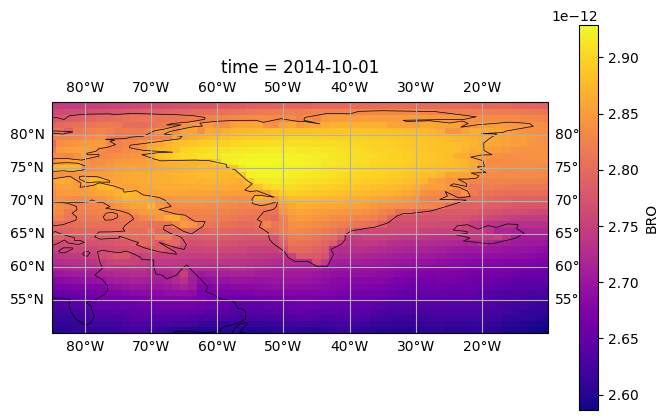

In [79]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.gridlines(draw_labels=True)
ax.coastlines(resolution="110m", color='black', lw=0.5)
ax.set_extent([275, 350, 50, 85], crs=ccrs.PlateCarree())
mpl.rcParams["figure.figsize"]= [8,5]
bro_s = ds.BRO.sel(lon=slice(275,350), lat=slice(50,85))
bro_s.isel(time=0).mean(dim="lev").plot(cmap="plasma", ax=ax)

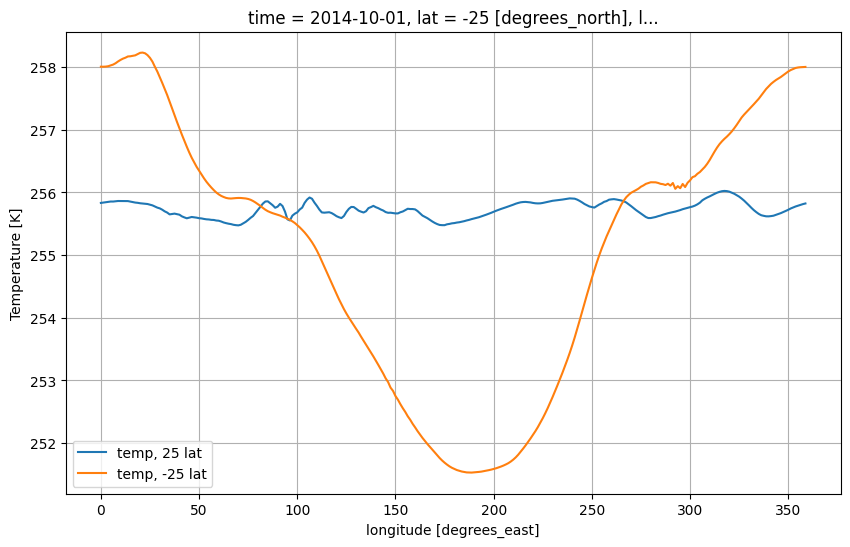

In [136]:
## vars need to have at least two coords/things in common ##

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ds.T.interp(lat=25, lev=2).plot(ax=ax)
ds.T.interp(lat=-25, lev=2).plot(ax=ax)
ax.legend(["temp, 25 lat", "temp, -25 lat"])
ax.grid(True)

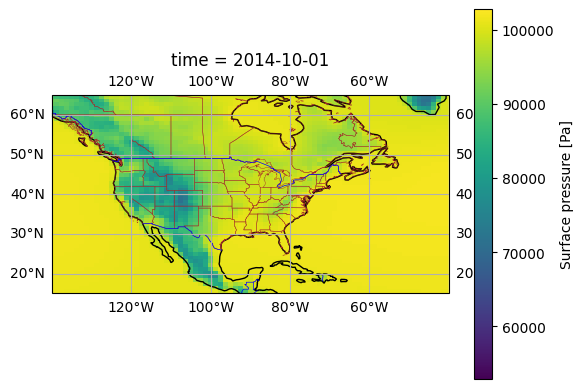

In [29]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax.gridlines(draw_labels=True)
ax.coastlines(resolution="110m", color='black')
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='brown')
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='blue');
ax.set_extent([-140, -40, 15, 65], crs=ccrs.PlateCarree())
ds.PS.isel(time=0).plot(ax=ax)

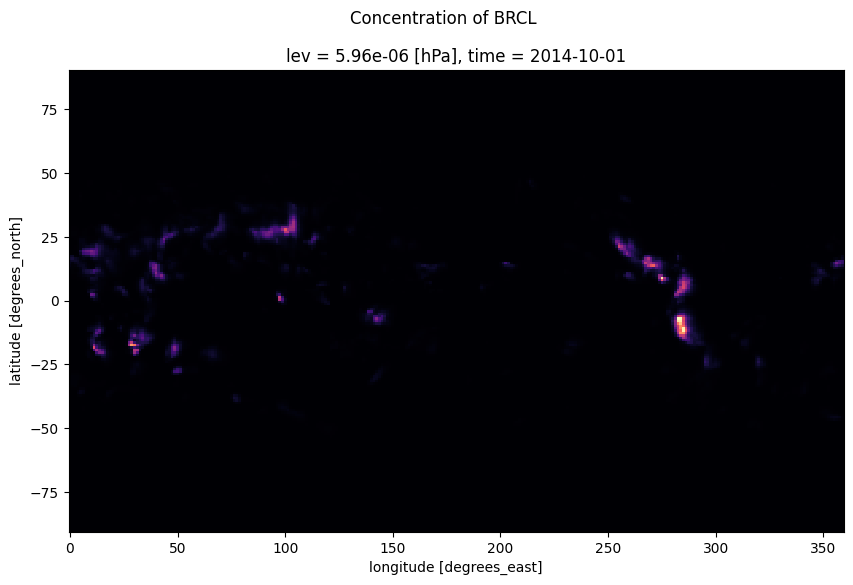

In [16]:
## UNNORMALIZED COLOUR MAP ##
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots(1,1, figsize=[10,6])
num = 0
fig.suptitle("Concentration of BRCL", ha="center")
def update(num):
    ax.clear()
    ds.BRCL.isel(lev=num*3,time=0).plot(ax=ax, cmap="magma")
    cb = ax.collections[-1].colorbar
    cb.remove()
    num += 1
                                        #range = 29
anim = FuncAnimation(fig, update, frames=range(29), interval=300, repeat=False)
anim

anim.save("brcl_unnorm.gif", writer="pillow");

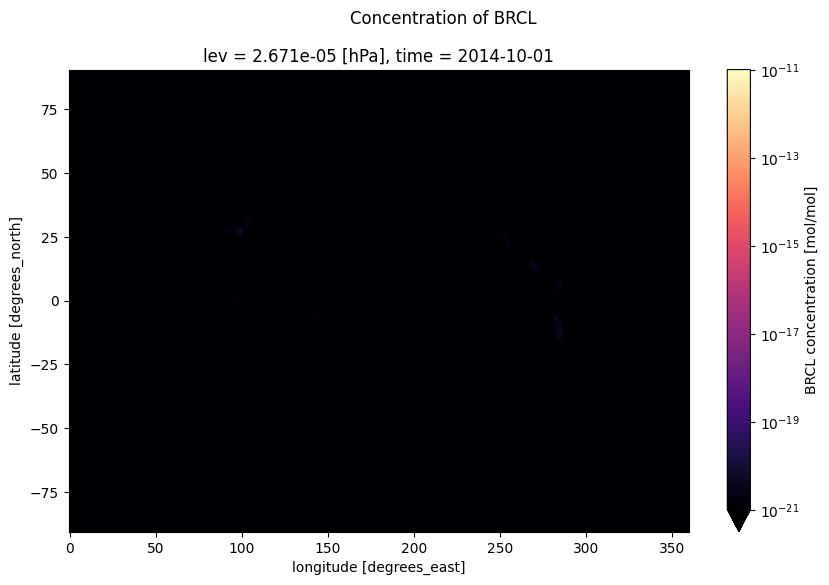

In [232]:
## NORMALIZED COLOUR MAP, IN PROGRESS ##
fig, ax = plt.subplots(1,1, figsize=[10,6])
num = 0
norm = mpl.colors.LogNorm(vmin=10**-21, vmax=10**-11)
ds.BRCL.isel(lev=num,time=0).plot(ax=ax, cmap="magma", norm=norm)
fig.suptitle("Concentration of BRCL", ha="center")
def update(num):
    ax.clear()
    num += 1
    ds.BRCL.isel(lev=num*3,time=0).plot(ax=ax, cmap="magma", norm=norm)
    cb = ax.collections[-1].colorbar
    cb.remove()
                                        #range = 29
anim = FuncAnimation(fig, update, frames=range(29), interval=300, repeat=False)
anim

anim.save("brcl_norm.gif", writer="pillow");

In [1]:
plt.scatter(x=ds.HNO3.lat.sel(slice(-90,90)),
            y=ds.HNO3.lon.sel(slice(-90,90)), 
            z=ds.HNO3.isel(time=0))

NameError: name 'plt' is not defined

# playing w ds functions

In [5]:
ds_reshape = xr.Dataset({"vari1": (('w','x', 'y', 'z'), [[[[32, 64]]]]), "vari2": (('y', 'z'), [[128, 256]])})
# on above line, number brackets corresponds to number coords, also order matters a lot
ds_reshape.transpose(..., 'x')
ds_reshape.expand_dims('k')
ds_reshape.squeeze('x')

x = ds_reshape.to_dataarray()
x.to_dataset(dim='variable')

array = xr.DataArray([1,2,3,4], dims='x')
array.shift(x=2)
array.roll(x=2)

<xarray.DataArray (x: 4)> Size: 32B
array([3, 4, 1, 2])
Dimensions without coordinates: x

In [61]:
ds = xr.Dataset(
    {
        "A": (("x", "y"), [[1, 2], [3, 4]]),
        "B": (("x", "y"), [[5, 6], [7, 8]]),
    },
    coords={"x": ["b", "a"], "y": [1, 0]},
)
ds

<xarray.Dataset> Size: 88B
Dimensions:  (x: 2, y: 2)
Coordinates:
  * x        (x) <U1 8B 'b' 'a'
  * y        (y) int64 16B 1 0
Data variables:
    A        (x, y) int64 32B 1 2 3 4
    B        (x, y) int64 32B 5 6 7 8

In [72]:
dax = xr.DataArray([100, 99], [("x", [0, 1])])

day = xr.DataArray([90, 80], [("y", [0, 1])])

# ds.sortby("x")
ds.sortby('y', 'x')

<xarray.Dataset> Size: 88B
Dimensions:  (x: 2, y: 2)
Coordinates:
  * x        (x) <U1 8B 'b' 'a'
  * y        (y) int64 16B 0 1
Data variables:
    A        (x, y) int64 32B 2 1 4 3
    B        (x, y) int64 32B 6 5 8 7